In [68]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
#tf.get_logger().setLevel('ERROR') # turn off tf warnings 
import tensorflow as tf
import glob
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import XGBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

# prepare numerical data

In [69]:
train = pd.read_csv('train.csv')

In [70]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


balanced class

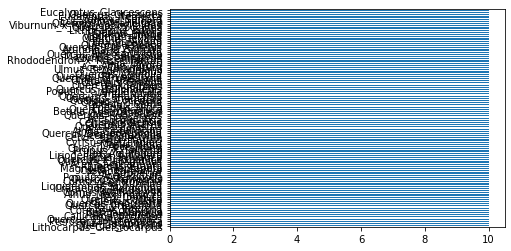

In [71]:
train['species'].value_counts().plot(kind = 'barh')
plt.show()

In [72]:
test = pd.read_csv('test.csv')

In [73]:
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


get x and y from raw data

In [74]:
Y_id = train.pop('id')

Y_label = train.pop('species')

test_id = test.pop('id')

X = train.values

X_test = test.values

normalize data

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_testS = scaler.transform(X_test)

split training set to training and validation

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(random_state=233, test_size=0.2)

In [77]:
#from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_label = pd.Series(encoder.fit_transform(Y_label))

#x_train, x_valid, y_train, y_valid
train_ID, valid_ID = next(sss.split(X_scaled, y_label))

In [78]:
X_train, y_train = X_scaled[train_ID], y_label[train_ID]

X_valid, y_valid = X_scaled[valid_ID], y_label[valid_ID]

In [79]:
train_id = Y_id[train_ID]
train_species = Y_label[train_ID]

valid_id = Y_id[valid_ID]
valid_species = Y_label[valid_ID]

# ml example, gradient boosting with grid search

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
xg= GradientBoostingClassifier(random_state=0)
# create a dictionary of parameters
params = {
    'n_estimators': (100, 200),
    'learning_rate': list(np.arange(0.1, 0.3, 0.1)),
    'max_depth': [1, 3]
    }
# create randomized search object with various combinations of parameters
search_xg= GridSearchCV(xg, params, cv=3, scoring = 'accuracy', refit = True, n_jobs=-1, verbose = 5)
#search_xg.fit(X_train, y_train) 

In [ ]:
search_xg.fit(X_train, y_train) 

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 17.6min


In [31]:
xg= GradientBoostingClassifier(random_state=0)

In [32]:
search_xg_best= search_xg.best_estimator_ 
search_xg_best

GradientBoostingClassifier(max_depth=2, n_estimators=200, random_state=0)

In [47]:
y_prob_xgb = search_xg_best.predict_proba(X_valid)[:,1]
y_prob_xgb

array([0.00000000e+00, 1.16299598e-18, 2.12004973e-20, 1.36097834e-18,
       6.07488669e-19, 2.91711475e-18, 2.08398853e-10, 4.36164907e-13,
       2.72726419e-19, 1.18649925e-12, 8.92132855e-08, 1.36904198e-16,
       4.18345658e-15, 3.44885342e-12, 1.09424617e-16, 2.31638813e-11,
       7.11716650e-06, 2.24873109e-15, 5.13814926e-08, 4.15387057e-09,
       4.38493364e-20, 1.76525290e-10, 1.82550941e-06, 7.18262193e-07,
       4.79846300e-19, 2.79706372e-18, 1.46183202e-17, 1.86262471e-18,
       7.97559154e-09, 1.59133076e-11, 4.97091910e-16, 8.80511339e-13,
       1.03440131e-10, 2.62371294e-12, 3.63752329e-16, 8.42428330e-12,
       5.37894104e-11, 7.65641303e-07, 1.75187300e-18, 2.78982534e-14,
       8.52828665e-14, 1.40854822e-11, 5.41820983e-17, 3.55699274e-10,
       6.34328911e-12, 8.74485448e-11, 2.45192634e-10, 1.29122703e-14,
       1.30099691e-08, 5.07571177e-16, 1.15008890e-05, 4.44278676e-15,
       1.97911529e-18, 1.80196214e-08, 1.44835760e-14, 1.04961329e-05,
      

In [43]:
y_pred_xgb = search_xg_best.predict(X_valid)
y_pred_xgb

array([57, 84, 90, 24, 92, 90,  9, 27, 67, 80, 43, 78, 53, 32, 51, 72, 62,
        0, 79, 63, 61, 54, 31, 98, 18, 51, 65, 84, 56, 91, 56, 62,  8, 80,
        5, 87, 55, 28, 38, 38,  3, 96, 73, 53, 91, 11,  3, 71, 49, 48, 73,
        2, 84, 21, 59, 94, 27, 68, 52, 98, 79, 41, 83, 27, 29, 83, 82, 15,
       50,  3, 46, 71, 45, 39, 34, 86, 29, 86, 79, 79, 26, 11, 70, 36, 81,
       39, 95,  5, 91, 28, 44,  8, 52, 66,  4,  3, 94, 35, 20, 20, 15, 94,
       47, 13, 39, 77, 43, 47, 79, 22, 56,  2, 23, 31, 45, 31,  4, 97, 17,
       56, 82, 96, 76, 14, 30, 48, 83, 19, 28, 25, 88, 65, 49, 54, 77, 22,
       64, 41, 68, 22, 95, 72, 22,  7, 69, 67, 10, 25,  6, 65, 89, 61,  3,
       89, 29,  1, 94, 31, 83, 51, 57,  8, 74, 33, 28, 69, 54, 66, 62, 11,
       96,  0, 31, 71,  8, 14, 87, 21,  1, 12, 67, 14, 33, 34, 41, 83, 30,
       79, 33, 57, 36,  6, 54, 50, 76, 29, 87, 91])

In [44]:
confusion_matrix(y_true=y_valid, y_pred=y_pred_xgb)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 2]])

In [51]:
print(classification_report(y_valid, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.40      1.00      0.57         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       0.50      1.00      0.67         2
           9       1.00      0.50      0.67         2
          10       1.00      0.50      0.67         2
          11       0.67      1.00      0.80         2
          12       1.00      0.50      0.67         2
          13       1.00      0.50      0.67         2
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         2
          17       1.00    

In [87]:
sorted_index_xgb=search_xg_best.feature_importances_.argsort()[-10:]
sorted_index_xgb

array([187,   6, 177, 164,   2,  40,  35, 156, 128, 149])

<AxesSubplot:>

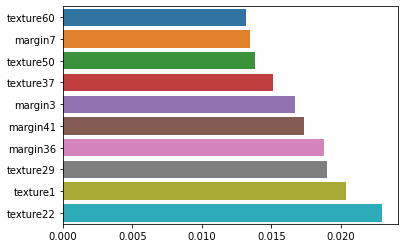

In [90]:
sns.barplot(search_xg_best.feature_importances_[sorted_index_xgb], train.columns[sorted_index_xgb])

In [39]:
y_pred_xgb_train = search_xg_best.predict(X_train)
print(classification_report(y_train,y_pred_xgb_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
          17       1.00    

In [83]:
# Gradient Boosting
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

gbc = GradientBoostingClassifier(random_state=1)

gbc.fit(X_train, y_train)

pred1 = gbc.predict(X_train)

print(classification_report(y_true=y_train, y_pred=pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
          17       1.00    

In [84]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# Randon Forest

In [82]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
pred2 = rf.predict(X_valid)
print(classification_report(y_true=y_valid, y_pred=pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       0.67      1.00      0.80         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

In [89]:

pred_rf_train = rf.predict(X_train)

print(classification_report(y_true=y_train, y_pred=pred_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
          17       1.00    

In [101]:
sorted_index_rf=rf.feature_importances_.argsort()[-10:]
sorted_index_rf

array([133,  79,  49,  58,  54, 135,  80,   1, 136,  47])

<AxesSubplot:>

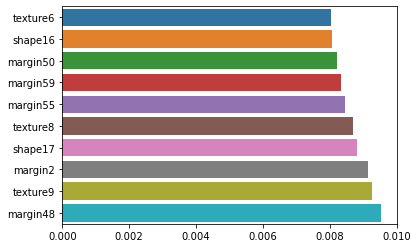

In [103]:
sns.barplot(rf.feature_importances_[sorted_index_rf], train.columns[sorted_index_rf])

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, grid_probs_gb)
roc_auc = metrics.auc(fpr, tpr)

# Adaboost with randomized search

In [94]:
adaboost= AdaBoostClassifier(random_state=0)
# create a dictionary of parameters
params = {
    'n_estimators': list(np.arange(100, 1050, 50)),
    'learning_rate': list(np.arange(0.1, 0.8, 0.1))
}
# create gridsearch object with various combinations of parameters
random_search_ada=  RandomizedSearchCV(adaboost, params, cv=3, scoring = 'accuracy', refit = True, n_jobs=-1, verbose = 5)
random_search_ada

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5, 0.6,
                                                          0.7000000000000001],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000]},
                   scoring='accuracy', verbose=5)

In [95]:
random_search_ada.fit(X_train, y_train) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.7min finished


RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5, 0.6,
                                                          0.7000000000000001],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000]},
                   scoring='accuracy', verbose=5)

In [96]:
search_ada_best= random_search_ada.best_estimator_ 
search_ada_best

AdaBoostClassifier(learning_rate=0.1, n_estimators=700, random_state=0)

In [97]:
y_pred_ada = search_ada_best.predict(X_valid)
y_pred_ada

array([21, 68, 70, 23, 92, 70,  9, 68, 67, 70, 79, 66, 68, 32, 51, 70, 22,
       20, 79, 71, 61, 22, 79, 70, 18, 51, 68, 45, 66, 94, 66, 22,  3, 59,
       42, 87, 55, 22, 38, 22, 55, 79, 86, 68, 94, 11, 66, 71, 20, 48, 79,
        2, 45, 68, 59, 81, 68, 79, 98, 98, 22, 98, 68, 79, 96, 66, 82, 15,
       68, 79, 68, 80, 31, 40, 39, 86, 96, 49, 98, 93, 26, 11, 80, 36, 86,
       39, 95, 31, 49, 22, 55, 98, 86, 68,  1, 86,  3, 68, 20, 68, 15,  3,
       98, 13, 22, 68, 43, 81, 79, 70, 66,  2, 79, 55, 68, 23,  4, 68,  3,
       66, 82, 55, 76, 14, 30, 48, 75, 19, 68, 96, 21, 79, 49,  3, 68, 96,
       55, 41, 96, 34, 95, 68, 22, 86, 79, 59, 68, 79,  6, 65, 89, 79, 55,
       89, 55,  1, 17, 68, 66, 66, 57,  1, 74, 68, 42, 10, 54, 68,  3,  1,
       96, 20, 66, 66, 94, 14, 87, 68,  1, 12, 67, 98, 33, 22, 55, 66, 81,
       55, 33, 34, 34,  6, 68, 96, 76, 68, 87, 79])

In [98]:
confusion_matrix(y_true=y_valid, y_pred=y_pred_ada)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [99]:
print(classification_report(y_valid, y_pred_ada))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.40      1.00      0.57         2
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       1.00      0.50      0.67         2
          10       0.00      0.00      0.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         2
          17       0.00    

In [100]:
pred_ada = gridsearch_ada.predict(X_valid)

print(classification_report(y_true=y_valid, y_pred=pred_ada))

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Gradient Boosting

In [63]:
gradient= GradientBoostingClassifier(random_state=0)
# create a dictionary of parameters
params = {
    'n_estimators': [100, 200],
    'learning_rate':[0.2,0.4],
    'max_depth':[1,2]
}
# create gridsearch object with various combinations of parameters
gridsearch_gb= GridSearchCV(gradient, params, cv=3, scoring = 'accuracy', refit = True, n_jobs=-1, verbose = 5)
gridsearch_gb

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4], 'max_depth': [1, 2],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=5)

In [64]:
gridsearch_gb.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed: 84.9min remaining:  7.7min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 86.9min finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4], 'max_depth': [1, 2],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=5)

In [66]:
pred_gb = gridsearch_gb.predict(X_valid)

print(classification_report(y_true=y_valid, y_pred=pred_gb))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.29      1.00      0.44         2
           4       1.00      0.50      0.67         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       0.50      1.00      0.67         2
           9       1.00      0.50      0.67         2
          10       1.00      0.50      0.67         2
          11       0.50      0.50      0.50         2
          12       0.50      0.50      0.50         2
          13       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         2
          17       0.00    

# image preparation

In [ ]:
import shutil
#create folder
original_path = 'images'

new_path = 'splited_images'

os.mkdir(new_path) # create this folder

train_dir = os.path.join(new_path,'train')
valid_dir = os.path.join(new_path, 'validation')


os.mkdir(train_dir)
os.mkdir(valid_dir)

def create_species_folder(path):
    for specie in Y_label.unique():
        specie_path = os.path.join(path, specie)
        os.mkdir(specie_path)

create_species_folder(train_dir)
create_species_folder(valid_dir)

def copy_image(idx, species, path):
    for i in idx.index:
        name = '{}.jpg'.format(idx.loc[i])
        specie = species.loc[i]
        specie_path = os.path.join(path, specie)
        src = os.path.join(original_path, name)
        dst = os.path.join(specie_path, name)
        shutil.copyfile(src, dst)

copy_image(train_id, train_species, train_dir)
copy_image(valid_id, valid_species, valid_dir)



In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                       horizontal_flip = True,
                                                       vertical_flip = True)

In [ ]:
target_size = (224, 224)
batch_size = 32
class_mode = 'categorical'

In [ ]:
training_set = datagen.flow_from_directory(directory= train_dir, 
                                           target_size= target_size, 
                                           batch_size= batch_size, 
                                           class_mode= class_mode)

Found 792 images belonging to 99 classes.


In [ ]:
valid_set = datagen.flow_from_directory(directory= valid_dir, 
                                        target_size= target_size, 
                                        batch_size= batch_size, 
                                        class_mode= class_mode)

Found 198 images belonging to 99 classes.


cnn example